In [3]:
import numpy as np 
from scipy.constants.constants import C2K, K2C
import math
from scipy import optimize as opt # for optimization
import matplotlib.pyplot as plt
from matplotlib import cm
from flow_stress.flow_stress import *

In [1]:
#testing testing testing
temp = range(300, 600)
pressure = [400]
grain_size = range(3, 35, 3)#range(5,10)#[10,12,13,16,27,29]##[5,6,7,8,9,10,11,12,13,14,15,30] #List of grainsizes 
width = [30]

In [2]:
temperature= 790
pressure = 550000000

In [11]:
calculate_coefficient_table(temperature)
print CS

#Optimizing equation to solve for volume
def fugacity_optimizer(temperature,pressure):

    def fun(v):
        return eos(temperature, v)- pressure
    volume = opt.brentq(fun, 5, 30) #Volume in cc/mo

    #Calculate fugacity 
    fugacity = PSfug(pressure, temperature, volume)
    
    return fugacity

fugacity_optimizer(temperature, pressure)

NameError: name 'temperature' is not defined

In [33]:
fugacity_optimizer_vectorized(t,p)

array([ 166.83294563,  191.98215191,  225.295237  ,  261.8241432 ])

In [3]:
t

array([ 723.15,  775.  ,  780.  ,  790.  ])

In [6]:
from flow_stress.fugacity_calculator import FugacityCalculator

f = FugacityCalculator(t, p)
fo_v = np.vectorize(f.fugacity_optimizer)
result_array = fo_v(T,P)


TypeError: only length-1 arrays can be converted to Python scalars

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants.constants import C2K, K2C
from scipy import optimize as opt # for optimization
from flow_stress.grid import *

t = np.arange(600, 800, 5)
tC = K2C(t)
#p = np.array([400000000, 450000000, 500000000, 550000000])
p = np.arange(200000000, 700000000, 5000000)
T, P = np.meshgrid(t,p)

f = fugacity_grid_optimizer(t, p)

TypeError: only length-1 arrays can be converted to Python scalars

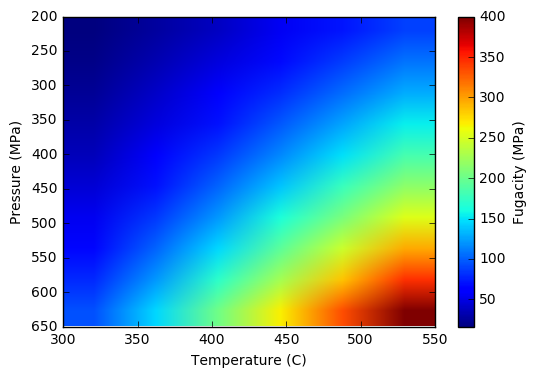

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants.constants import C2K, K2C
from scipy import optimize as opt # for optimization
from flow_stress.fugacity_calculator import *
from flow_stress.grid import *


t = np.arange(300, 600, 50)
p = np.arange(200, 700, 50)

fg = FugacityGrid(t, p)
fg.fugacity_grid_plot()



[10, 15]


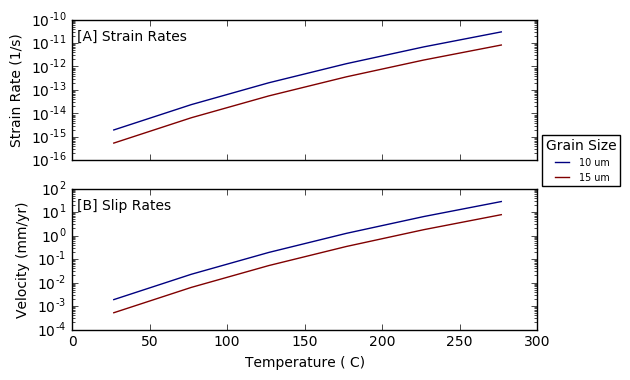

In [7]:
from flow_stress.flow_stress import *
from flow_stress.fugacity_calculator import *

grain_size = [10,15]
width = [30]

f = FlowStressCalculator(t, p)
f.calculate_fugacity()
print(grain_size)
ds = f.calculate_differential_stress(grain_size)
sr = f.calculate_strain_rate()
sl = f.calculate_slip_rate(width)

plot_strain_slip_rates(t,sr, sl, grain_size)

In [6]:
CS = np.zeros([10])

import numpy as np
temp = range(400, 402)
temp = C2K(temp)
press = [400000000, 410000000]
fug = []
for t in temp:
    for p in press:
        cs = calculate_coefficient_table(t)
        fu = fugacity_optimizer(t,p)
        fug.append(fu)

print(fug)

[86.11912549447844, 89.26649890835894, 86.69906427970614, 89.86527649018399]


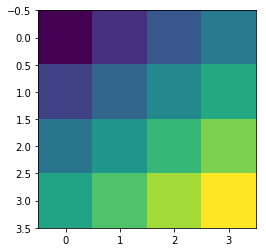

array([[  2.29260000e+11,   2.30060000e+11,   2.30860000e+11,
          2.31660000e+11],
       [  2.30406300e+11,   2.31210300e+11,   2.32014300e+11,
          2.32818300e+11],
       [  2.31552600e+11,   2.32360600e+11,   2.33168600e+11,
          2.33976600e+11],
       [  2.32698900e+11,   2.33510900e+11,   2.34322900e+11,
          2.35134900e+11]])

In [40]:
t = np.linspace(300, 306, 4, dtype=int)
t = C2K(t)
p = np.linspace(400, 406, 4, dtype=int)
p = p*1.0E6

def mesh_fun(xx, yy):
    zz = xx*yy
    return zz 

tt, pp = np.meshgrid(t, p)

zz = mesh_fun(tt, pp)

plt.imshow(zz)
plt.show()
zz

116.6204752272425

116.6204752272425